Final project of [Data Analysis with Python](https://www.coursera.org/learn/data-analysis-with-python/home/welcome): Data Analytics for House Pricing Data Set, alongside some of my comments to contextualise and make sense of the results, as well as a bit of additional code at the end.


This uses a dataset of house sale prices for King County, USA. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
%matplotlib inline

# Import Data Set


Load the data from csv.

In [8]:
# file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
file_name = 'data/house-data.csv'
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Display the data types of each column.

In [7]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Display a statistical summary of the dataframe.


In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling


Drop the columns <code>id</code> and <code>Unnamed: 0</code>, as these are not useful for modelling.

In [9]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see there are missing values for the columns `bedrooms` and `bathrooms`

In [13]:
for column in df.columns:
    if df[column].isnull().sum():
        print(f"Number of NaN values for the column '{column}':", df[column].isnull().sum())

Number of NaN values for the column 'bedrooms': 13
Number of NaN values for the column 'bathrooms': 10


Replace the missing values of the columns `bedrooms` and `bathrooms` with the mean of the respective columns.


In [14]:
for column in ['bedrooms', 'bathrooms']:
    df[column] = df[column].replace(np.nan, df[column].mean())

Make sure there are now no missing values

In [15]:
for column in df.columns:
    if df[column].isnull().sum():
        print(f"Error: there are still missing values for the column '{column}':", df[column].isnull().sum())
        break
else:
    print("No missing values!")

No missing values!


# Exploratory Data Analysis


Determine the number of houses for each distinct floor value.

In [16]:
df.value_counts(["floors"]).to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Determine whether houses with a waterfront view or without a waterfront view have more price outliers. Houses without a waterfront view have more price outliers.

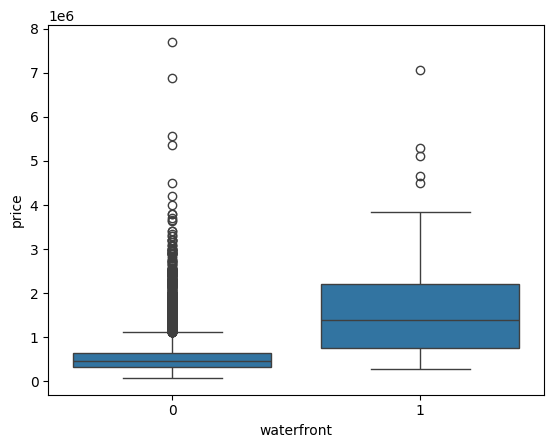

In [17]:
_ = sns.boxplot(df, x="waterfront", y="price")

Determine if the feature `sqft_above` is negatively or positively correlated with `price`. `sqft_above` is positively correlated with `price`.

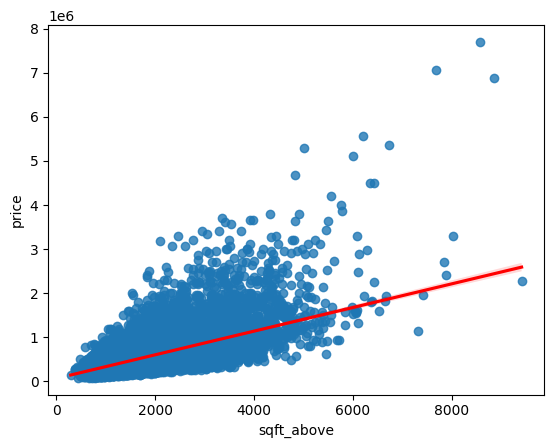

In [18]:
_ = sns.regplot(df, x="sqft_above", y="price", line_kws={"color": "red"})

Find the feature most correlated with price. `sqft_living` is most strongly correlated with price, with a correlation coefficient of 0.70. This feature could be used for an initial and basic model.

In [19]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development


Fit a linear regression model using the longitude feature <code>long</code> then calculate the R<sup>2</sup>. Unsurprisingly, this produces a very low R<sup>2</sup> score, since we wouldn't expect longitude by itself to meaningfully predict price. Longitude combined with latitude might be more predictive of price, since it represents neighbourhood. But we wouldn't expect this to be a linear relationship that could be captured with linear regression.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("R2:", lm.score(X, Y))

R2: 0.0004676943014898516


Fit a linear regression model to predict the price using the feature <code>sqft_living</code> then calculate the R<sup>2</sup>. This produces a much better R<sup>2</sup>, which is expected, since this feature is highly correlated with price.

In [ ]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("R2:", lm.score(X, Y))

R2: 0.4928532179037931


Fit a linear regression model to predict the price using the given list of features then calculate the R<sup>2</sup>. This produces an even better R<sup>2</sup>, which makes sense, since there are more variables to capture the relationship in the data between the features and price.


In [24]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
print("R2:", lm.score(X, Y))

R2: 0.6576951666037499


Create a pipeline to standardize features, transform features into polynomial features, fit the features using linear regression, then calculate the R<sup>2</sup>. This R<sup>2</sup> is again higher than before, as we're now able to model more complex functions.

In [ ]:
X = df[features]
Y = df['price']
pipeline = Pipeline([('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())])
pipeline.fit(X, Y)
pipeline.score(X, Y)

0.7513408515988734

The above results are mostly just the upper limit of how well the model could perform, since these models were all scored using the same data, which doesn't say much about how the model would perform on unseen data.

# Model Evaluation and Refinement


Split the data into training and testing sets.


In [27]:
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

Number of test samples: 3242
Number of training samples: 18371


Create and fit a ridge regression model on the training data, with a regularization parameter to 0.1, then calculate the R<sup>2</sup> on the test data. This produces a reasonable R<sup>2</sup> score. Since we're now using a separate test set to calculate the score, this is more representative of how the model would perform on unseen data.

In [40]:
ridge = Ridge(0.1)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.6478759163939111

Perform a second order polynomial transform on both the training data and testing data. Create and fit a ridge regression model using the training data, set the regularisation parameter to 0.1, and calculate the R<sup>2</sup> on the test data. We get a better R<sup>2</sup>, given that we're able to model a more complex function with the addition of non-linear features.


In [72]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
ridge = Ridge(0.1)
ridge.fit(x_train_pr, y_train)
print("R2:", ridge.score(x_test_pr, y_test))

R2: 0.7002744254571471


We can also perform grid search to look for the optimal parameters for polynomial degree and ridge regression alpha, with parameter normalization in the middle. Using this, we get a slightly improved R<sup>2</sup>, but it's a fairly small difference.

In [73]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([('polynomial', 'passthrough'), ('scale', StandardScaler()), ('model', 'passthrough')])
parameters = [{
    'polynomial': [PolynomialFeatures(degree=1), PolynomialFeatures(degree=2), PolynomialFeatures(degree=3)],
    'model': [Ridge(0.0001), Ridge(0.001), Ridge(0.01), Ridge(0.1), Ridge(1), Ridge(10), Ridge(100)],
}]
ridge = Ridge()
grid = GridSearchCV(pipeline, parameters, cv=4, scoring='r2')
grid.fit(x_train[features], y_train)
best = grid.best_estimator_
print("R2:", best.score(x_test[features], y_test))
print("Best parameters:", grid.best_params_)

R2: 0.7117229005000234
Best parameters: {'model': Ridge(alpha=0.0001), 'polynomial': PolynomialFeatures()}


Closing note: This merely looks at R<sup>2</sup>. In the real world, we'd generally want to consider more metrics, and specifically consider what is most meaningful for the problem we're trying to solve.